In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


In [3]:
pip install pandas_datareader

/usr/lib/python3/dist-packages/secretstorage/dhcrypto.py:15: CryptographyDeprecationWarning: int_from_bytes is deprecated, use int.from_bytes instead
  from cryptography.utils import int_from_bytes
/usr/lib/python3/dist-packages/secretstorage/util.py:19: CryptographyDeprecationWarning: int_from_bytes is deprecated, use int.from_bytes instead
  from cryptography.utils import int_from_bytes
Defaulting to user installation because normal site-packages is not writeable
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 109.5/109.5 kB 353.2 kB/s eta 0:00:001m804.0 kB/s eta 0:00:01
Note: you may need to restart the kernel to use updated packages.


In [4]:
import pandas_datareader as data

In [17]:
start = "2010-01-01"
end = '2022-01-01'

df = data.DataReader('AAPL','yahoo',start,end)
df.head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2009-12-31,7.619643,7.520000,7.611786,7.526071,352410800.0,6.415359
2010-01-04,7.660714,7.585000,7.622500,7.643214,493729600.0,6.515213
2010-01-05,7.699643,7.616071,7.664286,7.656429,601904800.0,6.526476
2010-01-06,7.686786,7.526786,7.656429,7.534643,552160000.0,6.422666
2010-01-07,7.571429,7.466071,7.562500,7.520714,477131200.0,6.410791


In [18]:
df.tail()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2021-12-27,180.419998,177.070007,177.089996,180.330002,74919600.0,179.289444
2021-12-28,181.330002,178.529999,180.160004,179.289993,79144300.0,178.255447
2021-12-29,180.630005,178.139999,179.330002,179.380005,62348900.0,178.344925
2021-12-30,180.570007,178.089996,179.470001,178.199997,59773000.0,177.171722
2021-12-31,179.229996,177.259995,178.089996,177.570007,64062300.0,176.545380


In [19]:
df = df.reset_index()


In [20]:
df.head()

,Date,High,Low,Open,Close,Volume,Adj Close
0,2009-12-31,7.619643,7.520000,7.611786,7.526071,352410800.0,6.415359
1,2010-01-04,7.660714,7.585000,7.622500,7.643214,493729600.0,6.515213
2,2010-01-05,7.699643,7.616071,7.664286,7.656429,601904800.0,6.526476
3,2010-01-06,7.686786,7.526786,7.656429,7.534643,552160000.0,6.422666
4,2010-01-07,7.571429,7.466071,7.562500,7.520714,477131200.0,6.410791


In [22]:
df = df.drop(['Date','Adj Close'],axis =1)
df.head()

,High,Low,Open,Close,Volume
0,7.619643,7.520000,7.611786,7.526071,352410800.0
1,7.660714,7.585000,7.622500,7.643214,493729600.0
2,7.699643,7.616071,7.664286,7.656429,601904800.0
3,7.686786,7.526786,7.656429,7.534643,552160000.0
4,7.571429,7.466071,7.562500,7.520714,477131200.0


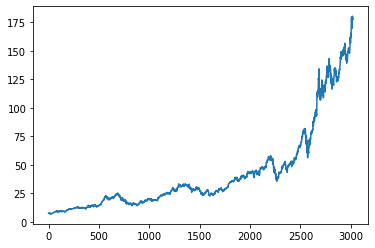

In [23]:
plt.plot(df.Close)

In [24]:
ma100 = df.Close.rolling(100).mean()
ma100

0            NaN
1            NaN
2            NaN
3            NaN
4            NaN
          ...   
3017    153.3444
3018    153.6667
3019    153.9991
3020    154.3202
3021    154.6399
Name: Close, Length: 3022, dtype: float64

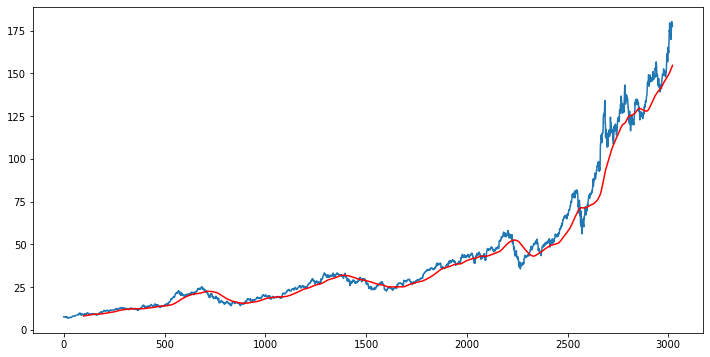

In [26]:
plt.figure(figsize=(12,6))
plt.plot(df.Close)
plt.plot(ma100,'r')

In [27]:
ma200 = df.Close.rolling(200).mean()
ma200

0             NaN
1             NaN
2             NaN
3             NaN
4             NaN
          ...    
3017    142.85570
3018    143.13220
3019    143.40125
3020    143.66845
3021    143.95365
Name: Close, Length: 3022, dtype: float64

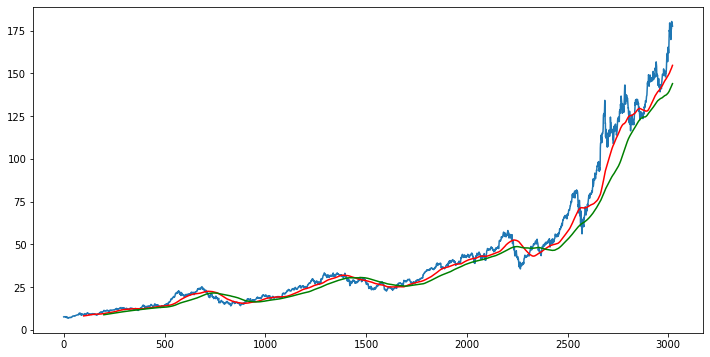

In [30]:
plt.figure(figsize=(12,6))
plt.plot(df.Close)
plt.plot(ma100,'r')
plt.plot(ma200,'g')

### Splitting data into Training and Testing

In [35]:
data_train = pd.DataFrame(df['Close'][0:int(len(df)*0.7)])
data_test = pd.DataFrame(df['Close'][int(len(df)*0.7):int(len(df))])

In [36]:
data_train

,Close
0,7.526071
1,7.643214
2,7.656429
3,7.534643
4,7.520714
...,...
2110,46.907501
2111,46.790001
2112,47.090000
2113,47.037498


In [37]:
data_test

,Close
2115,46.974998
2116,46.875000
2117,46.717499
2118,47.560001
2119,47.957500
...,...
3017,180.330002
3018,179.289993
3019,179.380005
3020,178.199997


In [38]:
from sklearn.preprocessing import MinMaxScaler
scalar = MinMaxScaler(feature_range=(0,1))

In [39]:
train_arr = scalar.fit_transform(data_train)
train_arr

array([[0.01641142],
       [0.0192931 ],
       [0.01961817],
       ...,
       [0.98966821],
       [0.98837669],
       [0.9910212 ]])

In [41]:
x_train = []
y_train = []

for i in range(100,train_arr.shape[0]):
    x_train.append(train_arr[i-100: i])
    y_train.append(train_arr[i,0])

x_train,y_train = np.array(x_train), np.array(y_train)

In [42]:
from keras.layers import Dense,Dropout,LSTM
from keras.models import Sequential

In [43]:
model = Sequential()
model.add(LSTM(units = 50, activation='relu', return_sequences = True, input_shape = (x_train.shape[1],1)))
model.add(Dropout(0.2))
model.add(LSTM(units = 60, activation='relu', return_sequences = True))
model.add(Dropout(0.3))
model.add(LSTM(units = 80, activation='relu', return_sequences = True))
model.add(Dropout(0.4))
model.add(LSTM(units = 120, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(units = 1))

2022-12-01 00:01:11.397953: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-12-01 00:01:11.400456: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2022-12-01 00:01:11.401087: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcublas.so.11'; dlerror: libcublas.so.11: cannot open shared object file: No such file or directory
2022-12-01 00:01:11.401497: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcublasLt.so.11'; dlerror: libcublasLt.so.11: cannot open shared object file: No such file or directory
2022-12-01 00:01:11.402592: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Co

In [45]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (None, 100, 50)           10400     
_________________________________________________________________
dropout (Dropout)            (None, 100, 50)           0         
_________________________________________________________________
lstm_1 (LSTM)                (None, 100, 60)           26640     
_________________________________________________________________
dropout_1 (Dropout)          (None, 100, 60)           0         
_________________________________________________________________
lstm_2 (LSTM)                (None, 100, 80)           45120     
_________________________________________________________________
dropout_2 (Dropout)          (None, 100, 80)           0         
_________________________________________________________________
lstm_3 (LSTM)                (None, 120)               9

In [46]:
model.compile(optimizer='adam',loss='mean_squared_error')
model.fit(x_train, y_train, epochs = 50)

2022-12-01 00:04:09.207753: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:185] None of the MLIR Optimization Passes are enabled (registered 2)


Epoch 1/50
63/63 [==============================] - 48s 630ms/step - loss: 0.0433
Epoch 2/50
63/63 [==============================] - 31s 490ms/step - loss: 0.0084
Epoch 3/50
63/63 [==============================] - 38s 595ms/step - loss: 0.0077
Epoch 4/50
63/63 [==============================] - 42s 674ms/step - loss: 0.0066
Epoch 5/50
63/63 [==============================] - 38s 599ms/step - loss: 0.0058
Epoch 6/50
63/63 [==============================] - 40s 634ms/step - loss: 0.0067
Epoch 7/50
63/63 [==============================] - 39s 615ms/step - loss: 0.0059
Epoch 8/50
63/63 [==============================] - 37s 580ms/step - loss: 0.0048
Epoch 9/50
63/63 [==============================] - 33s 521ms/step - loss: 0.0052
Epoch 10/50
63/63 [==============================] - 32s 514ms/step - loss: 0.0052
Epoch 11/50
63/63 [==============================] - 32s 514ms/step - loss: 0.0050
Epoch 12/50
63/63 [==============================] - 32s 507ms/step - loss: 0.0048
Epoch 13/50
6

In [47]:
model.save("keras_model.h5")

In [48]:
past100 = data_train.tail(100)
final_df = past100.append(data_test, ignore_index = True)

In [49]:
final_df.head()

,Close
0,43.057499
1,43.257500
2,43.750000
3,43.587502
4,43.582500


In [50]:
input_data = scalar.fit_transform(final_df)
input_data

array([[0.0518709 ],
       [0.05325229],
       [0.05665394],
       ...,
       [0.99343845],
       [0.98528824],
       [0.98093696]])

In [52]:
x_test = []
y_test = []

for i in range(100,input_data.shape[0]):
    x_test.append(input_data[i-100: i])
    y_test.append(input_data[i,0])

x_test,y_test = np.array(x_test), np.array(y_test)


In [53]:
y_pred = model.predict(x_test)

In [54]:
scalar.scale_

array([0.00690691])

In [55]:
scale_factor = 1/0.00690691
y_pred = y_pred*scale_factor
y_test = y_test*scale_factor

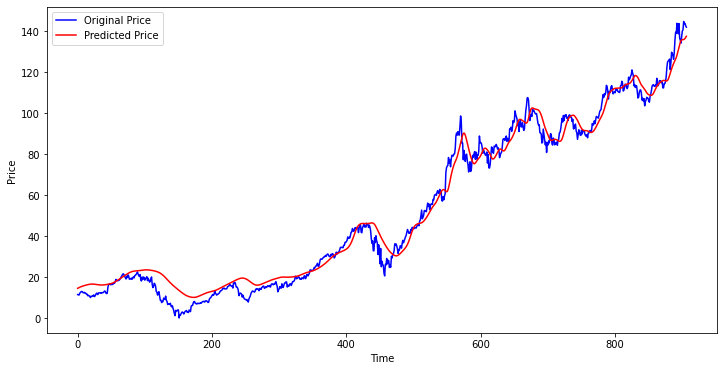

In [56]:
plt.figure(figsize=(12,6))
plt.plot(y_test,'b',label = 'Original Price')
plt.plot(y_pred,'r',label='Predicted Price')
plt.xlabel('Time')
plt.ylabel('Price')
plt.legend()
plt.show()